# **Features of H2O**

---



*   It can do data pre-processing(categorical encoding conversion etc)
*   It can take care of missing data imputation or other data cleaning activity
*   Provides leaderboard with matrix
*   It provides deployment ready code(MOJO is preferrable when model is large)





# ***Installation***

In [ ]:
!apt-get install default-jre
!java -version
!pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


# ***Importing libraries***

In [ ]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# ***Initializing H2O Cluster***

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp__dia4xw
  JVM stdout: /tmp/tmp__dia4xw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp__dia4xw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.1
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_j14353
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## ***Loading Dataset***

In [ ]:
train = h2o.import_file("housing_training_data.csv")
test = h2o.import_file("housing_testing_data.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# ***Data Pre-Processing***

In [ ]:
train_df = h2o.as_list(train,use_pandas=True)
train_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [ ]:
test_df = h2o.as_list(test,use_pandas=True)
test_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [ ]:
round((train_df.isnull().sum() * 100/ len(train_df)),2).sort_values(ascending=False)

Price         0.0
Longitude     0.0
Latitude      0.0
AveOccup      0.0
Population    0.0
AveBedrms     0.0
AveRooms      0.0
HouseAge      0.0
MedInc        0.0
dtype: float64

In [ ]:
round((test_df.isnull().sum() * 100/ len(test_df)),2).sort_values(ascending=False)

Price         0.0
Longitude     0.0
Latitude      0.0
AveOccup      0.0
Population    0.0
AveBedrms     0.0
AveRooms      0.0
HouseAge      0.0
MedInc        0.0
dtype: float64

# ***Converting Back to H2O***

In [ ]:
train = h2o.H2OFrame(train_df)
test = h2o.H2OFrame(test_df)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# ***Identifying predictors and response variables***

In [ ]:
x = train.columns
y = "Price"
x.remove(y)

# ***Building Model***

In [ ]:
#Run AutoML for 10 base models. 
#The ‘max_models’ argument specifies the number of individuals (or “base”) models and 
# does not include any ensemble models that can be trained separately.

model = H2OAutoML(max_models=10, seed=1)

model.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_1_20211003_92228

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.08694919328209451
RMSE: 0.29487148604450464
MAE: 0.1979381528765061
RMSLE: 0.0881075914337863
R^2: 0.9359727164184828
Mean Residual Deviance: 0.08694919328209451
Null degrees of freedom: 10057
Residual degrees of freedom: 10051
Null deviance: 13658.789778719492
Residual deviance: 874.5349860313065
AIC: 3993.393355840501

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.19110829211520666
RMSE: 0.43715934407857127
MAE: 0.28367674869494275
RMSLE: 0.12952410738830994
R^2: 0.8597678851684465
Mean Residual Deviance: 0.19110829211520666
Null degrees of freedom: 18575
Residual degrees of freedom: 18568
Null deviance: 2531

# ***LeaderBoard***

In [ ]:
lb = model.leaderboard
lb.head(rows=lb.nrows)

#the AutoML leaderboard uses cross-validation metrics to rank the models.
#A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_2_AutoML_1_20211003_92228,0.191108,0.437159,0.191108,0.283677,0.129524
StackedEnsemble_AllModels_1_AutoML_1_20211003_92228,0.191136,0.437191,0.191136,0.28373,0.129538
StackedEnsemble_BestOfFamily_3_AutoML_1_20211003_92228,0.194892,0.441466,0.194892,0.287926,0.130926
StackedEnsemble_BestOfFamily_2_AutoML_1_20211003_92228,0.19558,0.442244,0.19558,0.287524,0.130968
GBM_4_AutoML_1_20211003_92228,0.197237,0.444114,0.197237,0.29007,0.13186
GBM_2_AutoML_1_20211003_92228,0.200217,0.447456,0.200217,0.294684,0.133529
StackedEnsemble_BestOfFamily_1_AutoML_1_20211003_92228,0.201153,0.448501,0.201153,0.293888,0.133677
GBM_3_AutoML_1_20211003_92228,0.20356,0.451176,0.20356,0.295334,0.134103
GBM_1_AutoML_1_20211003_92228,0.204032,0.451699,0.204032,0.297188,0.134879
XGBoost_3_AutoML_1_20211003_92228,0.226462,0.47588,0.226462,0.319516,0.143539


# ***Predictions***

In [ ]:
preds = model.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
df = test.cbind(preds)
df

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,predict
2.0775,44,3.05316,1.02658,1321,4.3887,36.9,-121.76,1.214,1.56537
2.4375,20,4.79074,1.01296,1534,2.84074,36.93,-121.77,1.904,1.74475
3.0192,24,4.21475,0.969631,1844,4,36.93,-121.77,1.843,1.61267
3.2813,33,4.6711,1.05316,1075,3.57143,36.93,-121.77,1.9,1.8502
2.6434,20,4.40492,1.04426,2154,3.53115,36.92,-121.76,1.697,1.59537
3.5,9,5.05015,1.13818,3198,3.27329,36.92,-121.77,1.948,1.82221
3.1815,19,4.67784,0.947858,1856,3.45624,36.93,-121.79,1.891,1.75676
4.3906,19,5.69549,0.951128,975,3.66541,36.92,-121.78,2.412,2.37261
2.4053,21,4.94513,1.17168,2236,3.95752,36.93,-121.78,1.784,1.59407
2.0192,18,3.39617,1.08946,1033,3.30032,36.94,-121.77,1.713,1.48352


# ***Saving Result***

In [ ]:
h2o.export_file(df, path = "submission.csv", force = True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


# ***Saving LeaderBoard***

There are two ways to save the leader model — binary format and MOJO format. If you’re taking your leader model to production, then it’s suggested MOJO format since it’s optimized for production use.

In [ ]:
h2o.save_model(model.leader, path = "h2o_regression_model")

'/content/h2o_regression_model/StackedEnsemble_AllModels_2_AutoML_1_20211003_92228'

# ***Downloading Leaderboard***

In [ ]:
model.leader.download_mojo(path = "h2o_regression_model")

'/content/h2o_regression_model/StackedEnsemble_AllModels_2_AutoML_1_20211003_92228.zip'

# ***Ensemble Exploration***

Take a peek inside the Stacked Ensemble “All Models” model. The “All Models” ensemble is an ensemble of all of the individual models in the AutoML run. This is often the top-performing model on the leaderboard.

In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(model.leaderboard['model_id'].as_data_frame().iloc[:,0])


In [ ]:
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])


In [ ]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.7/dist-packages/h2o/estimators/stackedensemble.py:929: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


Examining the variable importance of the metalearner (combiner) algorithm in the ensemble. This shows us how much each base learner is contributing to the ensemble. The AutoML Stacked Ensembles use the default metalearner algorithm (GLM with non-negative weights), so the variable importance of the metalearner is actually the standardized coefficient magnitudes of the GLM.

In [ ]:
metalearner.coef_norm()

{'DRF_1_AutoML_1_20211003_92228': 0.0,
 'GBM_1_AutoML_1_20211003_92228': 0.1287305870868205,
 'GBM_2_AutoML_1_20211003_92228': 0.35124164082469256,
 'GBM_3_AutoML_1_20211003_92228': 0.09544420380453805,
 'GBM_4_AutoML_1_20211003_92228': 0.4781596101063351,
 'GLM_1_AutoML_1_20211003_92228': 0.0,
 'Intercept': 2.1203120386518863,
 'XGBoost_1_AutoML_1_20211003_92228': 0.008862737498399019,
 'XGBoost_2_AutoML_1_20211003_92228': 0.025698301596849275,
 'XGBoost_3_AutoML_1_20211003_92228': 0.0,
 'XRT_1_AutoML_1_20211003_92228': 0.0}

In [ ]:
model_ids

['StackedEnsemble_AllModels_2_AutoML_1_20211003_92228',
 'StackedEnsemble_AllModels_1_AutoML_1_20211003_92228',
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20211003_92228',
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20211003_92228',
 'GBM_4_AutoML_1_20211003_92228',
 'GBM_2_AutoML_1_20211003_92228',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20211003_92228',
 'GBM_3_AutoML_1_20211003_92228',
 'GBM_1_AutoML_1_20211003_92228',
 'XGBoost_3_AutoML_1_20211003_92228',
 'DRF_1_AutoML_1_20211003_92228',
 'XRT_1_AutoML_1_20211003_92228',
 'XGBoost_2_AutoML_1_20211003_92228',
 'XGBoost_1_AutoML_1_20211003_92228',
 'GLM_1_AutoML_1_20211003_92228']

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'gpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'gaussian', 'default': 'AUTO', '

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 108,
  'nthread': 2,
  'objective': 'reg:squarederror',
  'seed': 12,
  'silent': True,
  'subsample': 0.8,
  'updater': 'grow_gpu_hist'},
 108)

In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

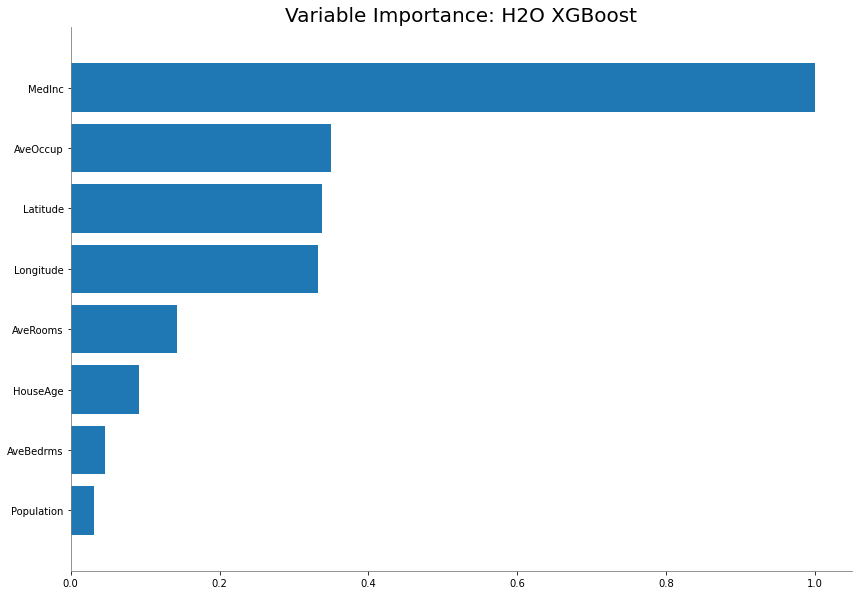

In [ ]:
out.varimp_plot()